In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
data = pd.read_csv('CC_GENERAL.csv')

data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

Using markdown, explain the meaning of each column and make observations about the dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data[data.duplicated(keep = False)]

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []

In [6]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
numeric_cols = data.select_dtypes(include=[np.number])
np.isinf(numeric_cols).sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
# Replace any infinite values with NaN (this is a rare case, but it's good to check)
data_cleaned = data.replace([np.inf, -np.inf], np.nan)

# Drop or fill rows with NaNs again if there were infinite values replaced
data_cleaned = data.fillna(0)

# Check for missing values in the dataset
print(data_cleaned.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [9]:
# Drop the 'CUST_ID' column to avoid errors during scaling
data_cleaned = data_cleaned.drop(columns=['CUST_ID'])

# Check for any other non-numeric columns
data_cleaned.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

Use markdown to make observations and explain what you have done.

In [10]:
# Generate the correlation matrix
correlation_matrix = data_cleaned.corr()

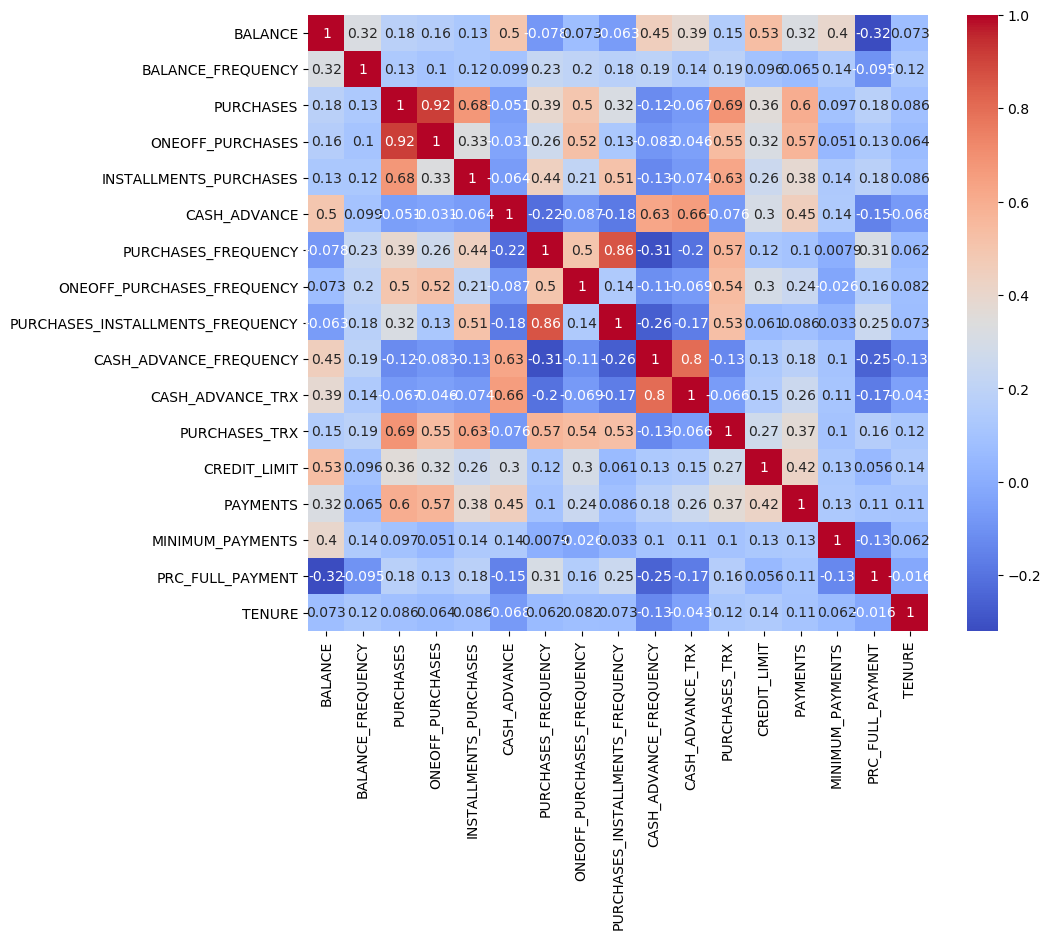

In [11]:
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot=True)
plt.show()

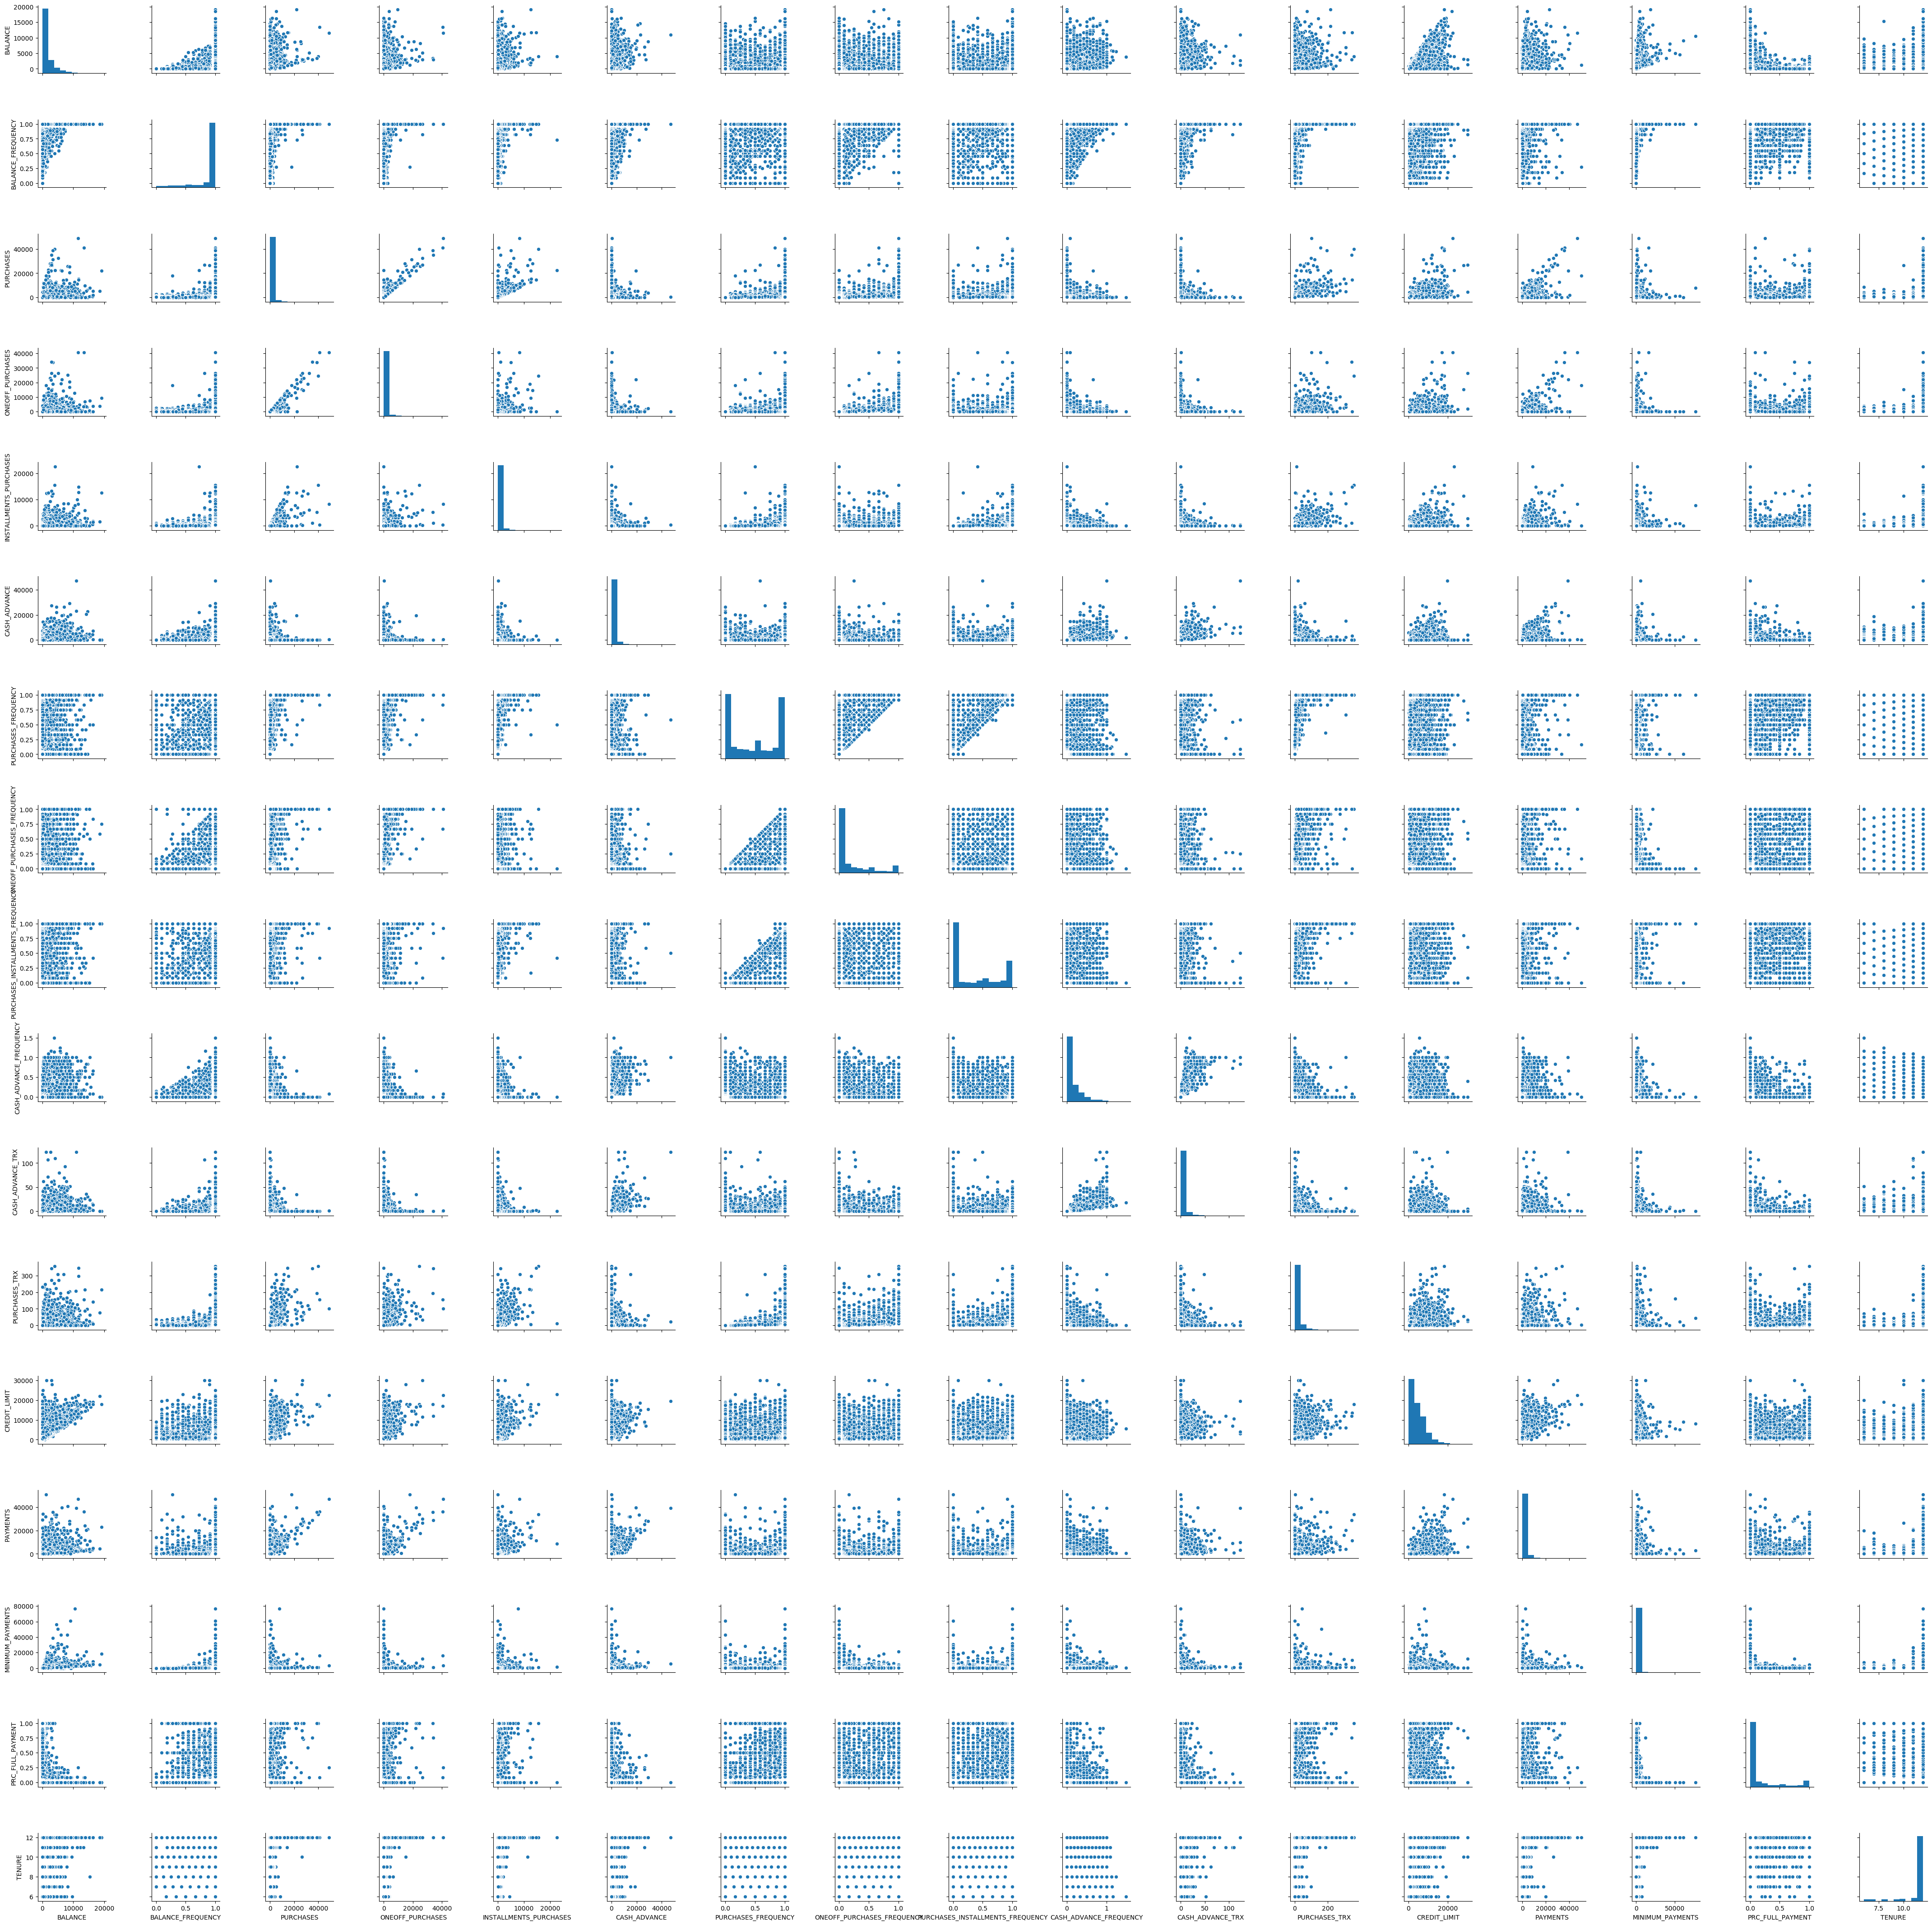

In [12]:
sns.pairplot(data_cleaned)
plt.show()

Use markdown to make observations. 

In [13]:
# Using MinMaxScaler to scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_cleaned)

# Converting the scaled data back into a DataFrame for easier interpretation
scaled_df = pd.DataFrame(scaled_data, columns=data_cleaned.columns)

scaled_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.002148           0.818182   0.001945          0.000000   
1  0.168169           0.909091   0.000000          0.000000   
2  0.131026           1.000000   0.015766          0.018968   
3  0.087521           0.636364   0.030567          0.036775   
4  0.042940           1.000000   0.000326          0.000393   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.00424      0.000000             0.166667   
1                 0.00000      0.136685             0.000000   
2                 0.00000      0.000000             1.000000   
3                 0.00000      0.004366             0.083333   
4                 0.00000      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000           0.00000       0.005587      0.033333   
1                0.166667           0.03252       0.000000      0.233333   
2                0.000000           0.00000       0.033520      0.250000   
3                0.055555           0.00813       0.002793      0.250000   
4                0.000000           0.00000       0.002793      0.040000   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  0.003979          0.001826          0.000000     1.0  
1  0.080893          0.014035          0.222222     1.0  
2  0.012264          0.008210          0.000000     1.0  
3  0.000000          0.000000          0.000000     1.0  
4  0.013374          0.003204          0.000000     1.0

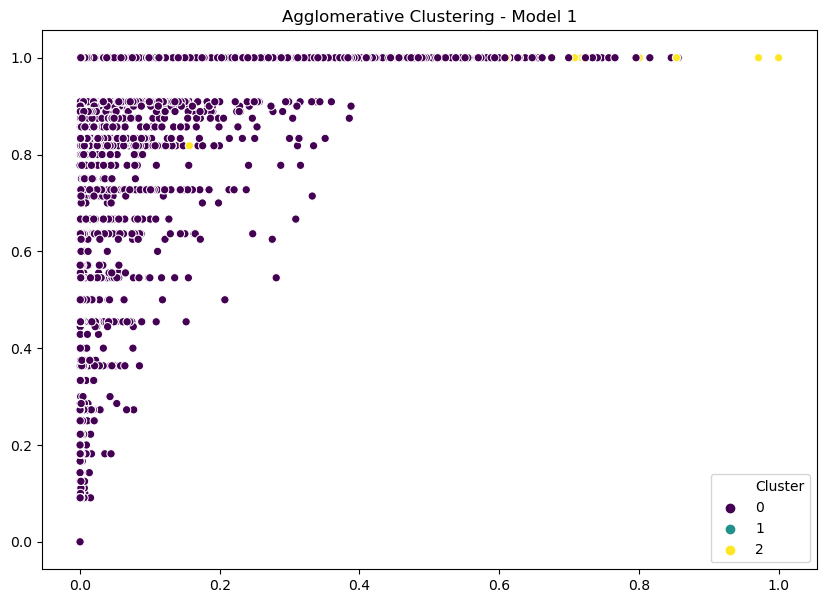

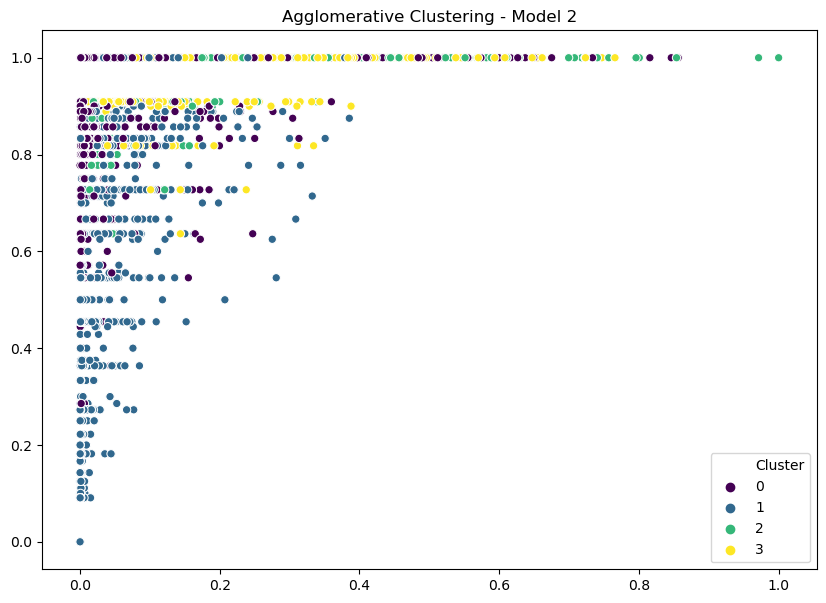

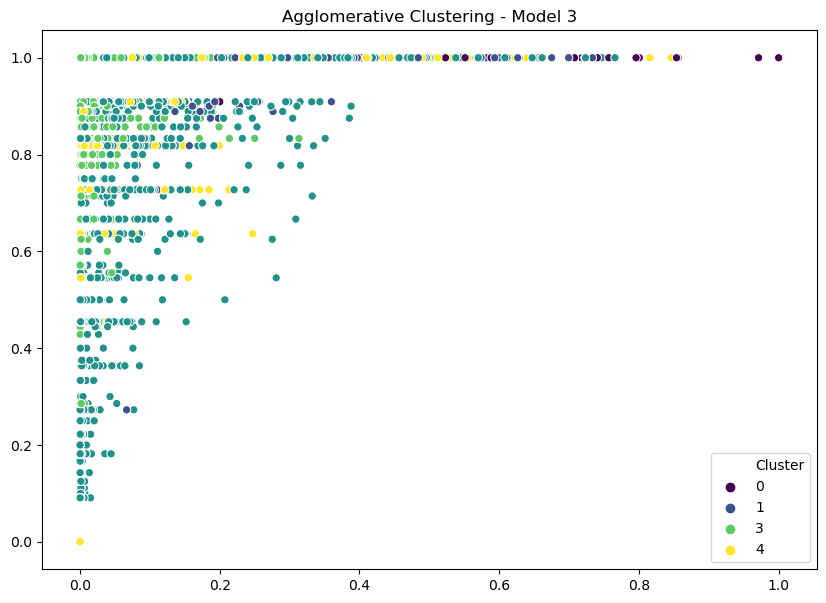

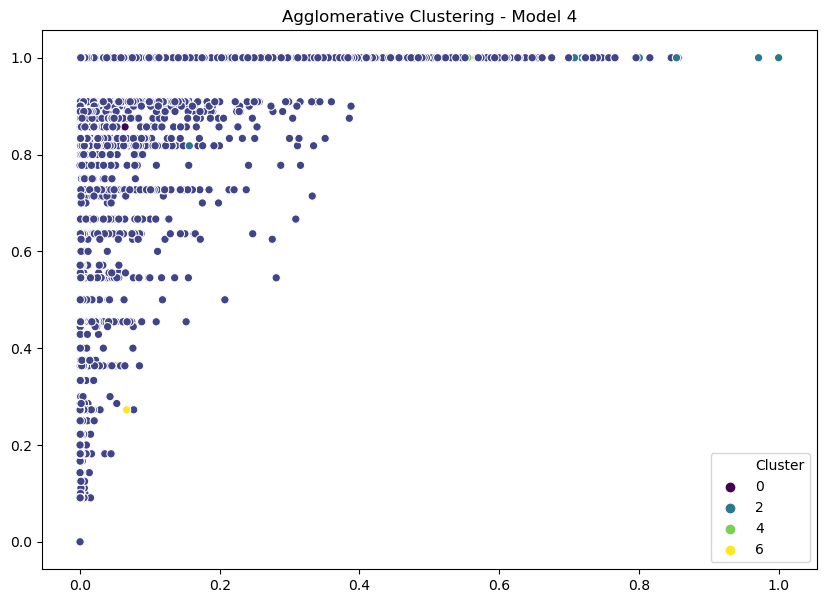

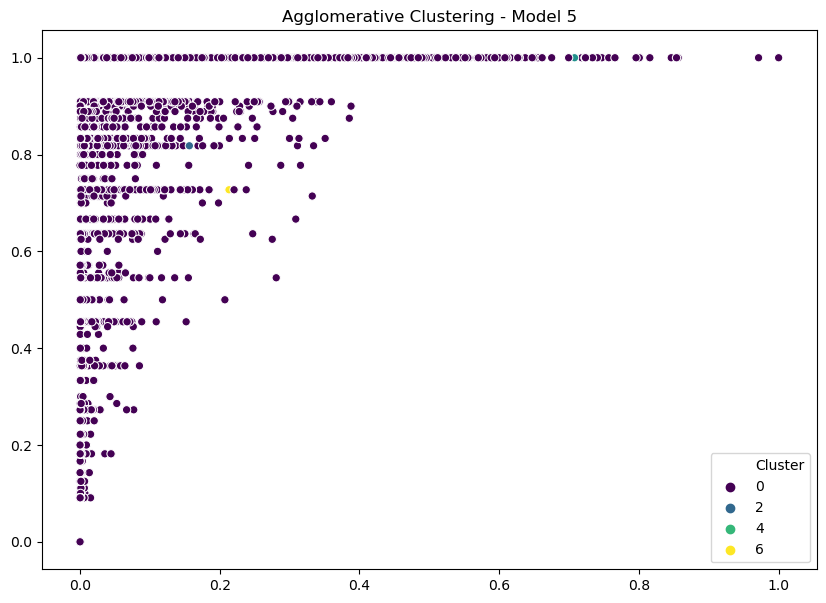

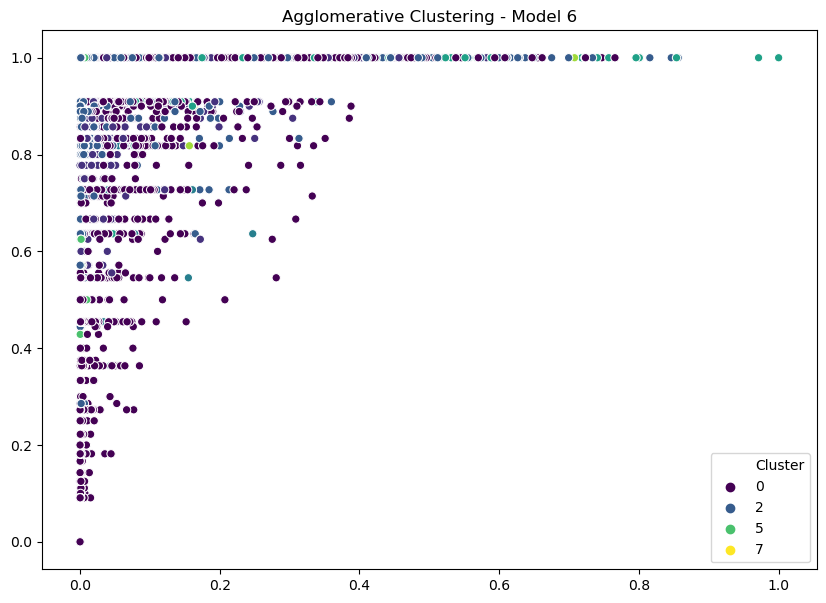

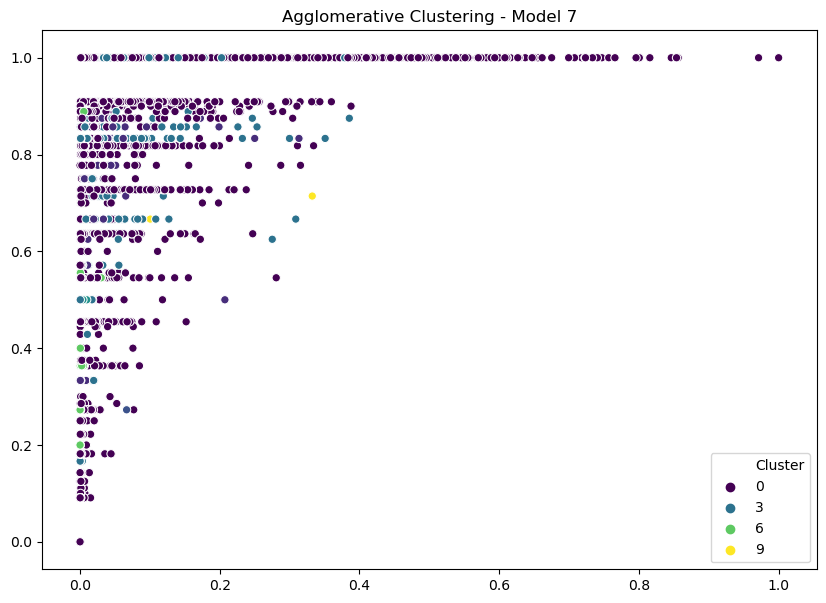

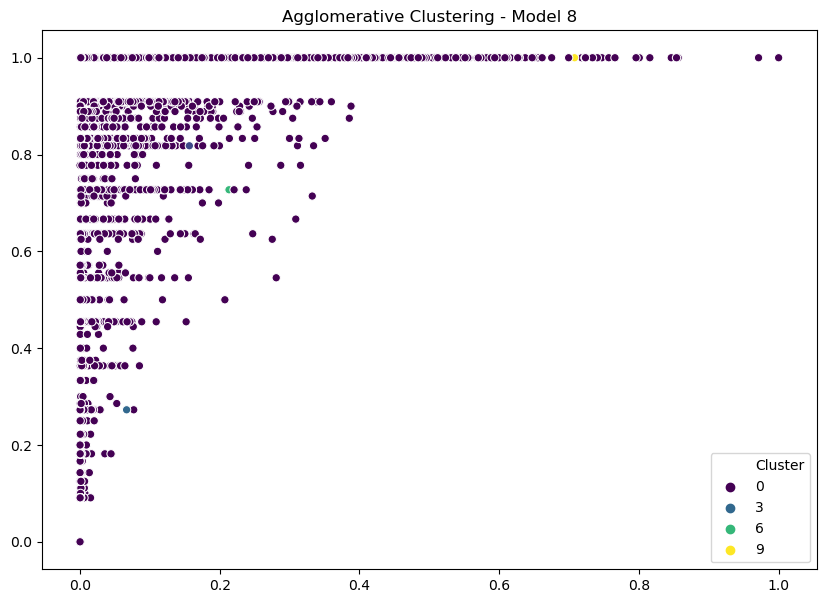

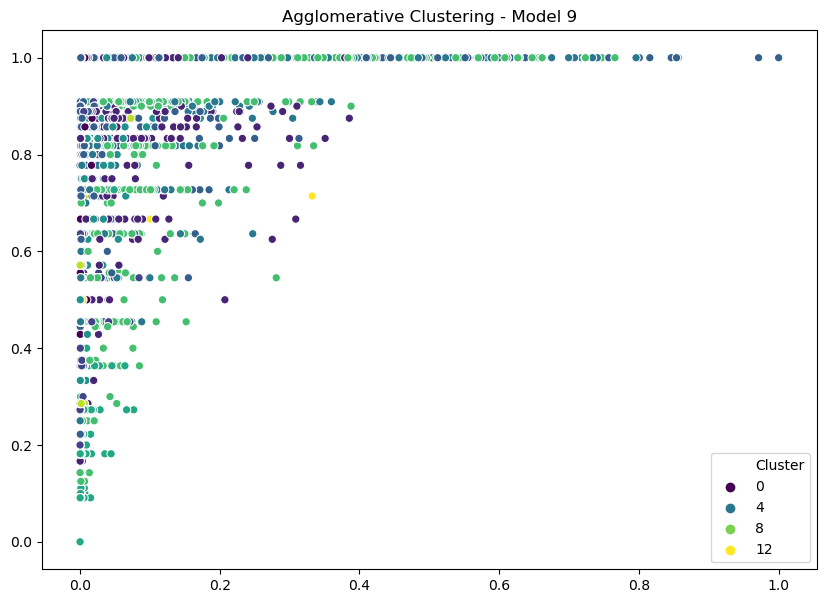

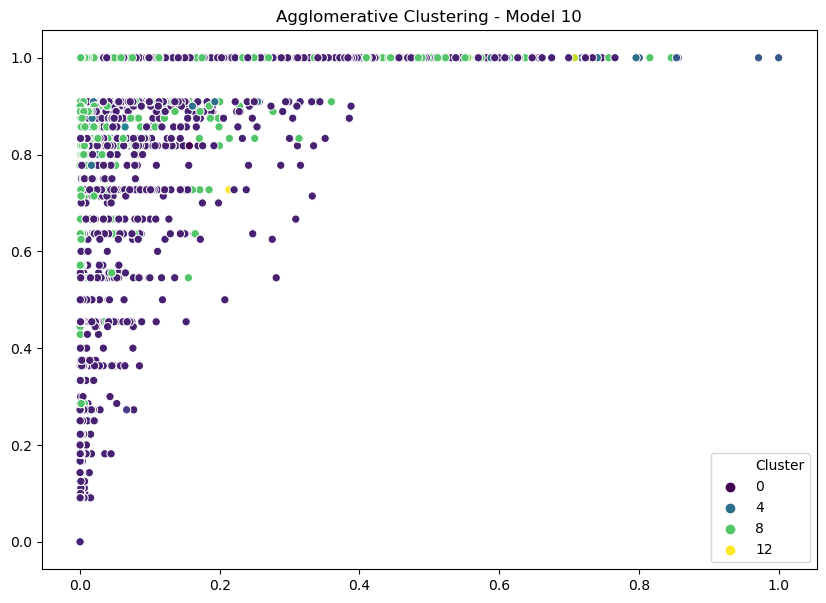

Silhouette Scores for Each Model:

      Model  n_clusters   affinity   linkage  silhouette_score
0   Model 1           3  euclidean   average          0.375775
1   Model 2           4  euclidean      ward          0.250198
2   Model 3           5  manhattan  complete          0.207959
3   Model 4           6  euclidean   average          0.209131
4   Model 5           7  manhattan    single          0.253665
5   Model 6           8  euclidean  complete          0.291341
6   Model 7           9     cosine   average          0.063117
7   Model 8          10  euclidean    single          0.224380
8   Model 9          11     cosine  complete          0.227962
9  Model 10          12  euclidean   average          0.314338


In [14]:
# Define different sets of hyperparameters for 10 models
hyperparameters = [
    {'n_clusters': 3, 'affinity': 'euclidean', 'linkage': 'average'},
    {'n_clusters': 4, 'affinity': 'euclidean', 'linkage': 'ward'},
    {'n_clusters': 5, 'affinity': 'manhattan', 'linkage': 'complete'},
    {'n_clusters': 6, 'affinity': 'euclidean', 'linkage': 'average'},
    {'n_clusters': 7, 'affinity': 'manhattan', 'linkage': 'single'},
    {'n_clusters': 8, 'affinity': 'euclidean', 'linkage': 'complete'},
    {'n_clusters': 9, 'affinity': 'cosine', 'linkage': 'average'},
    {'n_clusters': 10, 'affinity': 'euclidean', 'linkage': 'single'},
    {'n_clusters': 11, 'affinity': 'cosine', 'linkage': 'complete'},
    {'n_clusters': 12, 'affinity': 'euclidean', 'linkage': 'average'}
]

# List to store results
results = []

# Loop through each hyperparameter combination
for i, params in enumerate(hyperparameters):
    # Use AgglomerativeClustering with the current set of hyperparameters
    ac = AgglomerativeClustering(n_clusters=params['n_clusters'], 
                                 affinity=params['affinity'], 
                                 linkage=params['linkage'])
    
    # Fit the model and predict clusters
    data_cleaned['Cluster'] = ac.fit_predict(scaled_data)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(scaled_data, data_cleaned['Cluster'])
    
    # Store the results in the list
    results.append({
        'Model': f'Model {i+1}',
        'n_clusters': params['n_clusters'],
        'affinity': params['affinity'],
        'linkage': params['linkage'],
        'silhouette_score': silhouette_avg
    })
    
    # Visualize the clusters (using the first two features for visualization)
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=data_cleaned['Cluster'], palette='viridis')
    plt.title(f'Agglomerative Clustering - Model {i+1}')
    plt.show()

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results)
print("Silhouette Scores for Each Model:\n")
print(results_df)

[[5.72000000e+02 7.62000000e+02 7.69412624e-03 2.00000000e+00]
 [3.00000000e+01 1.96000000e+02 8.87881891e-03 2.00000000e+00]
 [5.91000000e+02 8.70000000e+02 1.07476240e-02 2.00000000e+00]
 ...
 [1.98900000e+03 1.99200000e+03 7.81168528e+00 3.75000000e+02]
 [1.99500000e+03 1.99600000e+03 1.02408477e+01 7.50000000e+02]
 [1.99400000e+03 1.99700000e+03 1.20025814e+01 1.00000000e+03]]


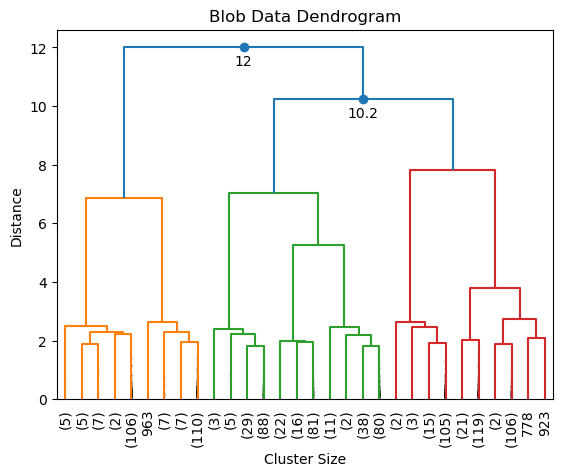

In [15]:
# Generate a random cluster dataset to experiment on. X = coordinate points, y = cluster labels (not needed)
X, y = make_blobs(n_samples=1000, centers=8, n_features=2, random_state=800)

# Generate distance matrix with 'linkage' function
distances = linkage(X, method="centroid", metric="euclidean")
print(distances)

# Annotated dendrogram for cleaner output
def annotated_dendrogram(*args, **kwargs):
    # Standard dendrogram from SciPy
    scipy_dendro = dendrogram(*args, truncate_mode='lastp', show_contracted=True, leaf_rotation=90.)

    plt.title('Blob Data Dendrogram')
    plt.xlabel('Cluster Size')
    plt.ylabel('Distance')
    
    # Annotating the dendrogram with the heights of the cluster merges
    for i, d, c in zip(scipy_dendro['icoord'], scipy_dendro['dcoord'], scipy_dendro['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        if y > 10:  # Annotate only heights greater than 10
            plt.plot(x, y, 'o', c=c)
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    return scipy_dendro

# Plot the annotated dendrogram
dn = annotated_dendrogram(distances)
plt.show()

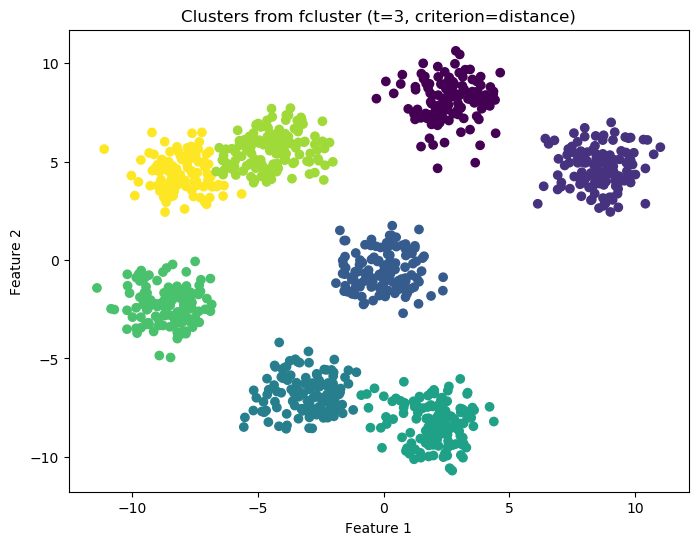

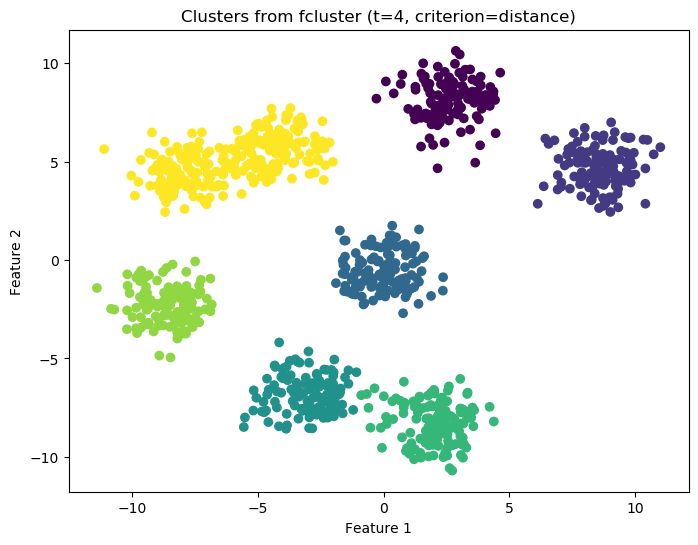

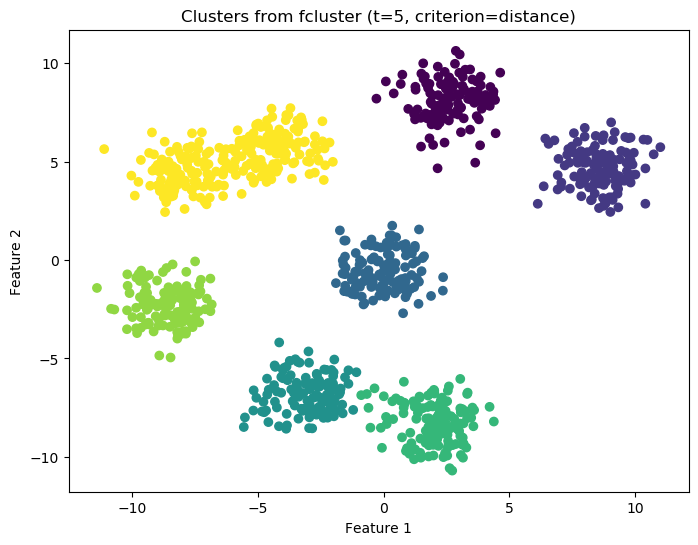

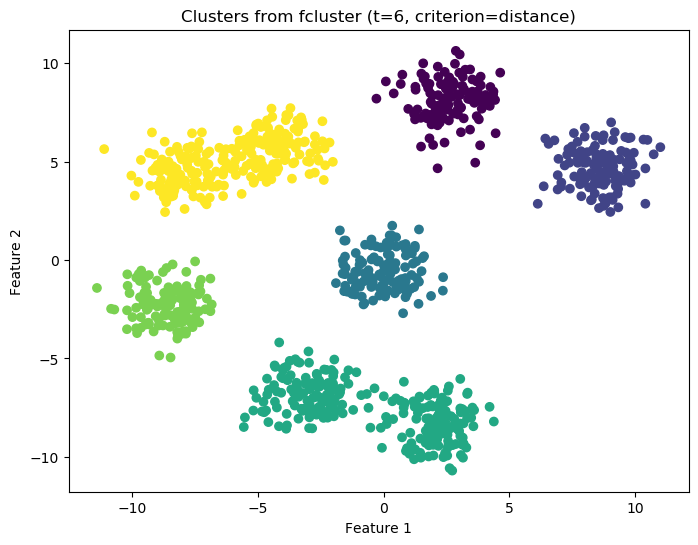

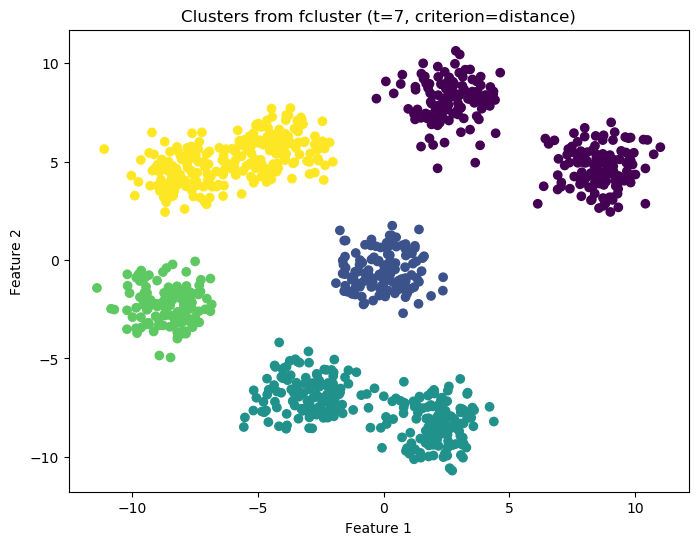

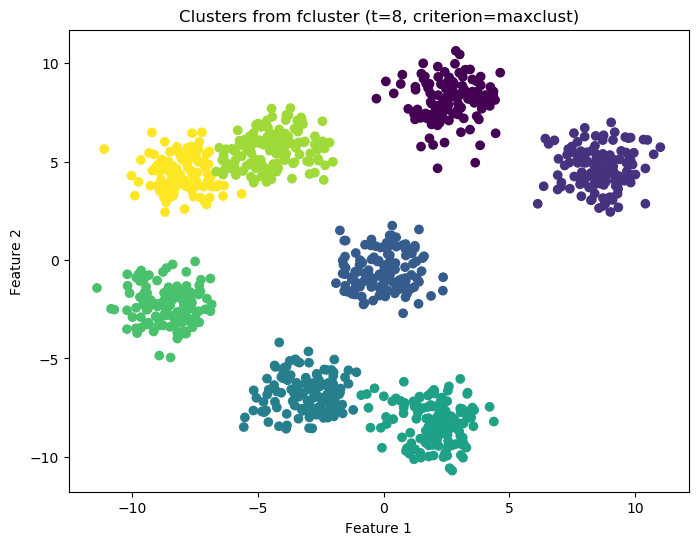

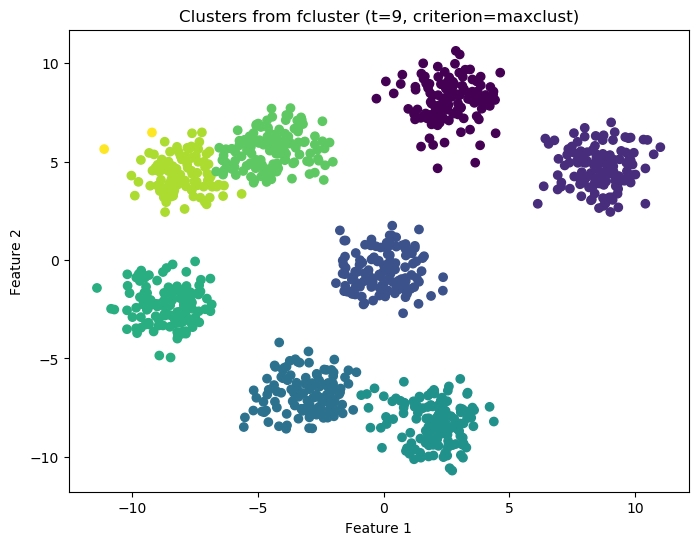

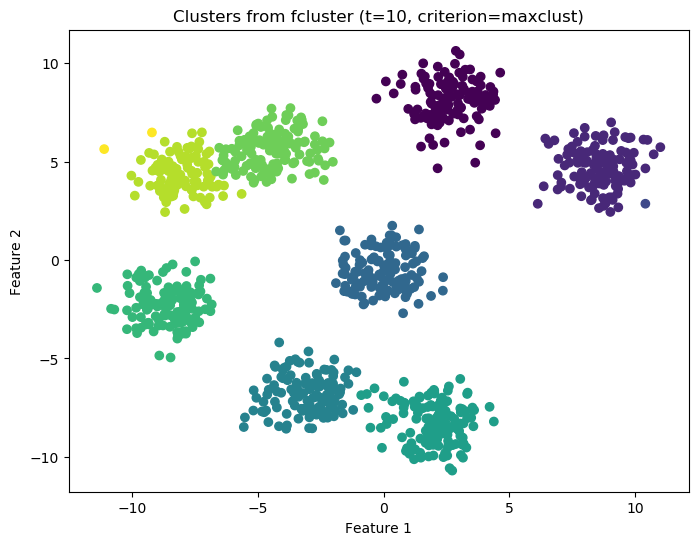

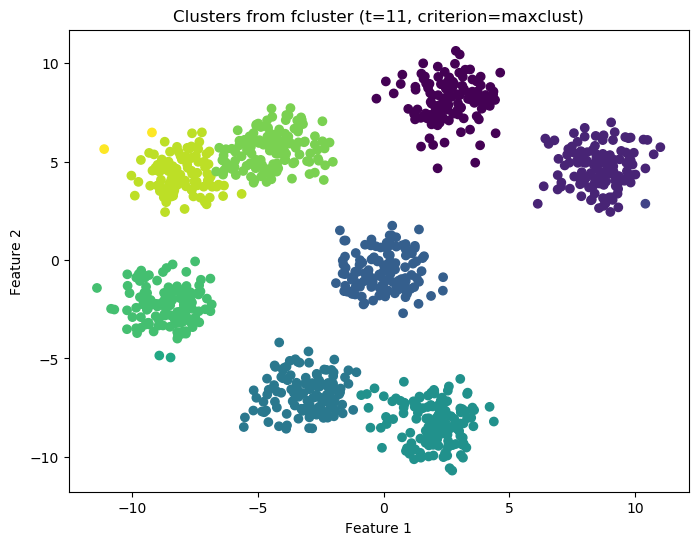

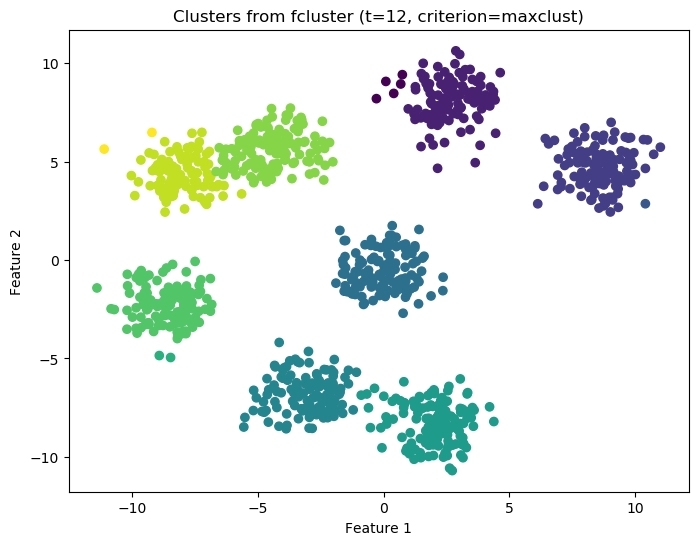

      Model   t criterion  silhouette_score
0   Model 1   3  distance          0.665768
1   Model 2   4  distance          0.680202
2   Model 3   5  distance          0.680202
3   Model 4   6  distance          0.647875
4   Model 5   7  distance          0.599805
5   Model 6   8  maxclust          0.665768
6   Model 7   9  maxclust          0.647842
7   Model 8  10  maxclust          0.594799
8   Model 9  11  maxclust          0.546831
9  Model 10  12  maxclust          0.497593


In [16]:
# Define different hyperparameter combinations for 'fcluster'
hyperparameters = [
    {'t': 3, 'criterion': 'distance'},
    {'t': 4, 'criterion': 'distance'},
    {'t': 5, 'criterion': 'distance'},
    {'t': 6, 'criterion': 'distance'},
    {'t': 7, 'criterion': 'distance'},
    {'t': 8, 'criterion': 'maxclust'},
    {'t': 9, 'criterion': 'maxclust'},
    {'t': 10, 'criterion': 'maxclust'},
    {'t': 11, 'criterion': 'maxclust'},
    {'t': 12, 'criterion': 'maxclust'}
]

# Loop through each hyperparameter combination, cluster the data, and calculate silhouette scores
results = []

for i, params in enumerate(hyperparameters):
    # Perform clustering with different hyperparameters
    clusters = fcluster(distances, t=params['t'], criterion=params['criterion'])
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, clusters)
    
    # Append the results for each model
    results.append({
        'Model': f'Model {i+1}',
        't': params['t'],
        'criterion': params['criterion'],
        'silhouette_score': silhouette_avg
    })
    
    # Visualize the clusters using a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
    plt.title(f'Clusters from fcluster (t={params["t"]}, criterion={params["criterion"]})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Display the silhouette scores for all models
results_df = pd.DataFrame(results)
print(results_df)

Select the best model for the use case and justify your choice in markdown.